<a href="https://colab.research.google.com/github/sahjitendra90/code_snippets/blob/master/K_Means_Clusteing_Arti_Kushwaha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Name-Arti Kushwaha**

**Taks 2: Prediction Using Unsupervised Machine Learning**

(From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.)

**K-Means Clustering Algorithm** 

**1. Importing Required Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

**2. Loading the iris dataset from sklearn**

scikit-learn comes with a few small datasets. This iris dataset can be loaded with load-iris function of sklearn dataset.

In [4]:
iris_data = datasets.load_iris()
iris_x_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_x_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
iris_x_df.shape

(150, 4)

In [6]:
iris_x_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
iris_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**3. Using 'Elbow Method' to find optimum number of clusters for k-means classification**

In [8]:
from sklearn.cluster import KMeans
x = iris_x_df.iloc[:, :].values
wcs = []  #wcss stands for 'within cluster sum of squares'

for i in range(1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)
    wcs.append(model.inertia_)

print(wcs)
    


[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.03998724608725, 34.29822966507177, 30.014398496240602, 28.036906353450473, 26.53452922077922, 24.017409798327485, 22.611814560232247, 21.2926111288597, 20.297750017748587, 19.211721918432453, 18.14746114179938, 17.353415138782786, 16.441876928626932, 15.62850638740345, 14.66764635854342]


**4.Plotting the Result (line graph)**

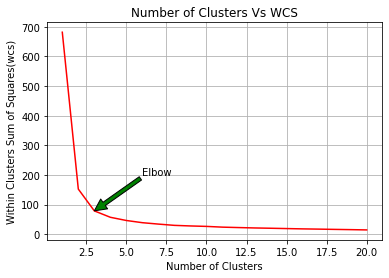

In [9]:
plt.plot(range(1, 21), wcs, color = 'r')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(wcs)')
plt.annotate('Elbow', xytext=(6,200), xy=(3,79), arrowprops={'facecolor':'green'})
plt.grid() 
plt.show()

###Elbow occurs where the line graph bends and wcs(within cluster sum of squares ) does not decrease significantly with every iteration. From the above graph, Elbow occurs at number of clusters equivalent to 3.
###So **optimum number of clusters for this Iris dataset = 3**

**5. Create and Train the Model ( KMeans)**

In [10]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 250, n_init = 15, random_state = 0)
y = model.fit_predict(x)

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

**6. Visualizing the Clusters by plotting scatter Graph**

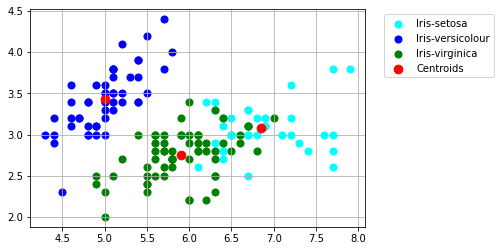

In [12]:
# Plotting the three clusters of first two columns(sepal length, sepal width) of input Iris data
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 50, c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 75, c = 'red', label = 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()

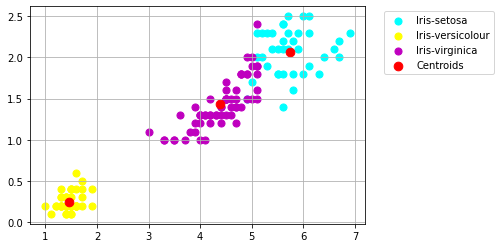

In [13]:
# Plotting the three clusters of third and fourth columns(petal length, petal width) of Iris data
plt.scatter(x[y == 0, 2], x[y == 0, 3], 
            s = 50, c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3], 
            s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 2], x[y == 2, 3],
            s = 50, c = 'm', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:,3], 
            s = 75, c = 'red', label = 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()

**Thank you!**